In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import KFold
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('customer.csv')
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


**Data** **Understanding**

In [ ]:
#familiarize ourselves with the amount of data we are working with
df.shape

(350, 11)

In [ ]:
#familiarize ourselves with the data types
df.dtypes

Customer ID                   int64
Gender                       object
Age                           int64
City                         object
Membership Type              object
Total Spend                 float64
Items Purchased               int64
Average Rating              float64
Discount Applied               bool
Days Since Last Purchase      int64
Satisfaction Level           object
dtype: object

In [ ]:
#figure out what type of memberships are available for this dataset
df['Membership Type'].unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [ ]:
#find out what types of satisfaction levels are available for this dataset
df['Satisfaction Level'].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied', nan], dtype=object)

In [ ]:
#To have a better understanding of the customer, we can get a summary statistic for their 'age', 'total spent' and 'items purchased'
df[['Age', 'Total Spend', 'Items Purchased']].describe()

,Age,Total Spend,Items Purchased
count,350.000000,350.000000,350.000000
mean,33.597143,845.381714,12.600000
std,4.870882,362.058695,4.155984
min,26.000000,410.800000,7.000000
25%,30.000000,502.000000,9.000000
50%,32.500000,775.200000,12.000000
75%,37.000000,1160.600000,15.000000
max,43.000000,1520.100000,21.000000


**Data** **Cleaning**

In [ ]:
#first we will check for missing values in our data
df.isna().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [ ]:
#we want to delete any rows that are duplicate for data accuracy and consistency
df.drop_duplicates(subset=None, keep='first')

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [ ]:
#We want to keep our data relatively recent, so we want to remove anyone that has not purchased in the store over the IQR.
Q1 = df['Days Since Last Purchase'].quantile(0.25)
Q3 = df['Days Since Last Purchase'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

#We want to find just the top outliers since bottom outliers would be someone who shopped very recent.
top_outliers = df['Days Since Last Purchase'] > upper_bound

print(top_outliers)

0      False
1      False
2      False
3      False
4      False
       ...  
345    False
346    False
347    False
348    False
349    False
Name: Days Since Last Purchase, Length: 350, dtype: bool


In [ ]:
#We can see that there are no top outliers for the 'Days since last purchase'
top_outliers.sum()

0

**Customer** **Lifetime** **Value**

In [ ]:
#Lets find out the Customer Lifetime Value(CLV) for all customers, then find a predictive model based on the CLV
#My formula for CLV would be: 'average purchase value' * Average Purchase Frequency * Average recency of last purchase

In [ ]:
#Estimate the Average Purchase Value
df['Average Purchase Value'] = df['Total Spend'] / df['Items Purchased']

#Calculate the Average Purchase Frequency
df['Average Purchase Frequency'] = df['Days Since Last Purchase'].mean()

#Calculate the Recency of Last Purchase
df['Average Recency Last Purchase'] = df['Days Since Last Purchase'].mean()

#Calculate CLV
df['CLV'] = df['Average Purchase Value'] * df['Average Purchase Frequency'] * df['Average Recency Last Purchase']
df['CLV'] = df['CLV'].round(2)

# Print CLV for each customer
print("Customer Lifetime Value (CLV) for each customer:")
print(df[['Customer ID', 'CLV']])


Customer Lifetime Value (CLV) for each customer:
     Customer ID       CLV
0            101  56566.27
1            102  50161.47
2            103  40119.53
3            104  55079.01
4            105  39176.02
..           ...       ...
345          446  46680.05
346          447  41577.62
347          448  52614.91
348          449  50142.19
349          450  36461.06

[350 rows x 2 columns]


In [ ]:
#Nothing seems to be out of the ordinary with CLV values.
df['CLV'].describe()

count      350.000000
mean     46113.749943
std       6360.893245
min      35011.800000
25%      40555.485000
50%      47387.000000
75%      51625.180000
max      59096.150000
Name: CLV, dtype: float64

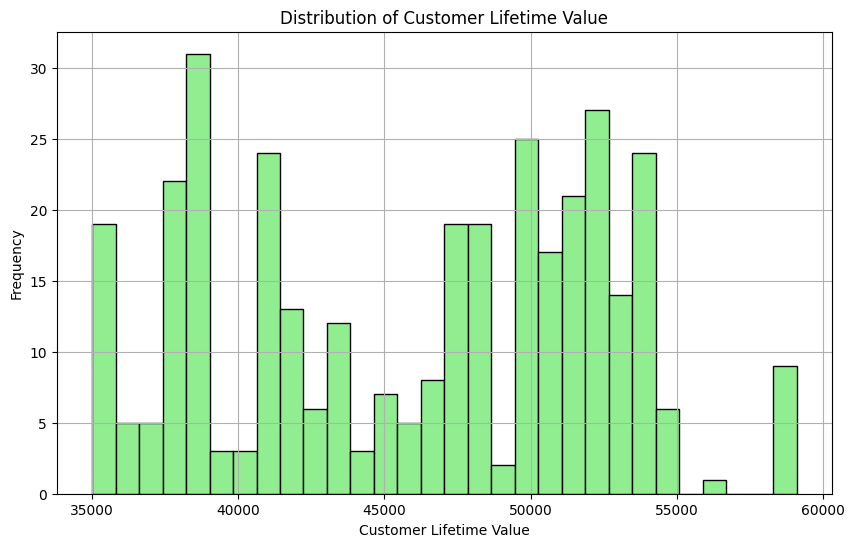

In [ ]:
#Lets take a look at a distribution of CLV and their frequency
clv_values = df['CLV']

plt.figure(figsize=(10, 6))
plt.hist(clv_values, bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

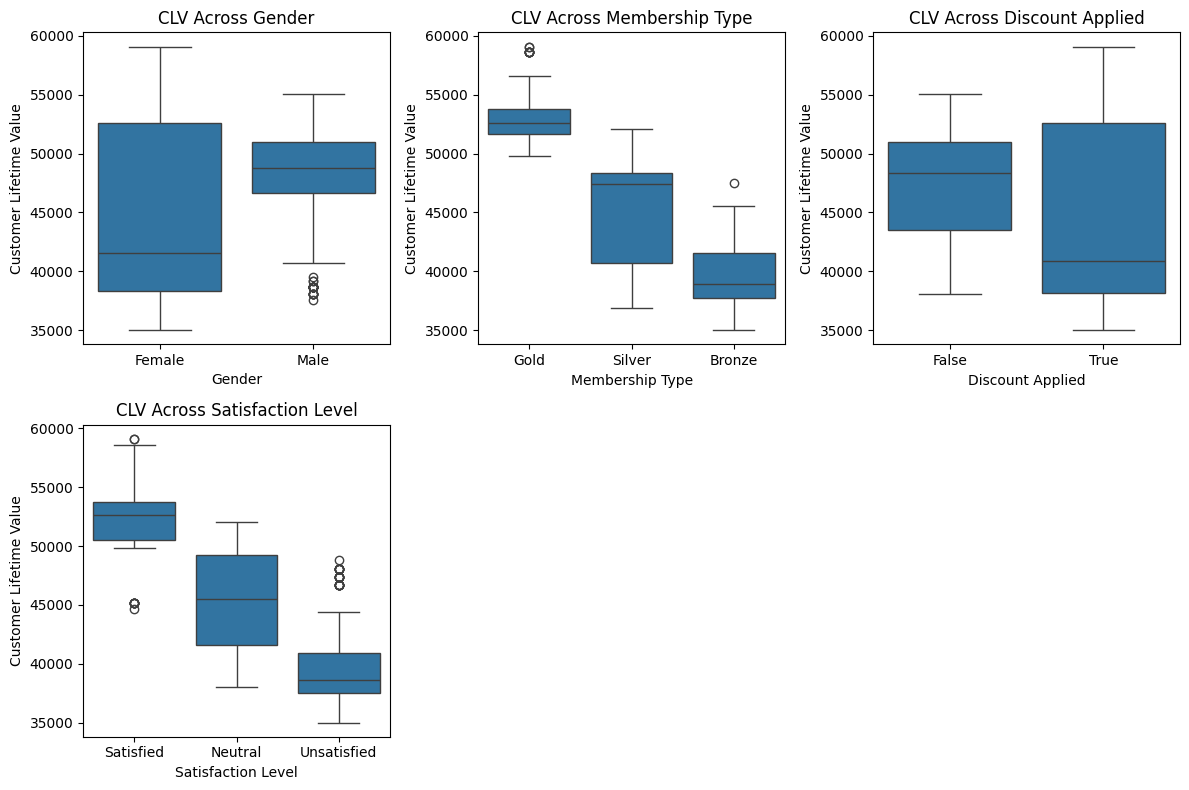

In [ ]:
#Lets create a boxplot of CLV values across different columns such as 'gender', 'membership type',etc...
#We can use a forloop and subplot functions to create multiple plots in a single figure.
columns = ['Gender','Membership Type', 'Discount Applied', 'Satisfaction Level']

plt.figure(figsize=(12, 8))
for i, column in enumerate(columns, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=column, y='CLV', data=df)
    plt.title(f'CLV Across {column}')
    plt.xlabel(column)
    plt.ylabel('Customer Lifetime Value')
    plt.tight_layout()
plt.show()

In [ ]:
#We will perform a Random Forest Regression Model
X = df[['Average Purchase Value', 'Average Purchase Frequency', 'Average Recency Last Purchase']]
y = df['CLV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

#mse, rmse
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Model Performance:")
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Random Forest Regression Model Performance:
Root Mean Squared Error (RMSE): 51.309831694718405
R-squared (R2) Score: 0.9999251102721737


The RMSE value of 51.31 indicates that, on average, the model's predictions are approximately 51.31 units away from the actual CLV values, which is a good indicator that the model has great performance.
R2 score being as high as it was is usually a good thing but when it's too close to 1, then there might be an overfitting problem.

I will use k-fold cross-validation with Random Forest Regression models to assess their performance and mitigate overfitting. K-fold cross-validation involves splitting the dataset into k subsets, training the model on k-1 folds, and evaluating it on the remaining fold.

In [ ]:
k = 5
rmse_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)

    # Calculate the RMSE for this fold and append it to the list of scores
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

average_rmse = np.mean(rmse_scores)

print("Average RMSE across all folds:", average_rmse)


Average RMSE across all folds: 87.80033280073383


Average RMSE across all folds being 87.80 indicates the average difference between the predicted Customer Lifetime Value (CLV) values and the actual CLV values across all folds in the k-fold cross-validation process.

**Predicting future Total Spend based on customers behaviors and characteristics.**

In [ ]:
#First let us use Linear regression model to predict 'Total Spend'
#Preprocess the data and select features
X = df[['Age', 'Items Purchased','Discount Applied','Average Rating', 'Days Since Last Purchase']]
y = df['Total Spend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions on the testing set
y_pred = model.predict(X_test)

#Model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Linear Regression Model Performance:
Mean Squared Error (MSE): 2376.1387242735377
Root Mean Squared Error (RMSE): 48.745653388518015
R-squared (R2) Score: 0.9824271756891049


In [ ]:
# Define features (X) and target variable (y)
X = df[['Age', 'Items Purchased', 'Discount Applied', 'Average Rating', 'Days Since Last Purchase']]
y = df['Total Spend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gb = gb_model.predict(X_test)

#Model performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression Model Performance:")
print("Mean Squared Error (MSE):", mse_gb)
print("Root Mean Squared Error (RMSE):", rmse_gb)
print("R-squared (R2) Score:", r2_gb)

Gradient Boosting Regression Model Performance:
Mean Squared Error (MSE): 84.79416588693158
Root Mean Squared Error (RMSE): 9.208374769031265
R-squared (R2) Score: 0.9993729015210694


**Takeaways from the two predictive models:**

The Gradient Boosting Regression model has a significantly lower MSE compared to the Linear Regression model. This suggests that the Gradient Boosting model's predictions are closer to the actual Total Spend values on average, indicating better overall performance in terms of prediction accuracy.

Similarly, the RMSE of the Gradient Boosting Regression model is much lower than that of the Linear Regression model, indicating that the Gradient Boosting model's predictions have less variability and are closer to the actual Total Spend values.

Overall, the results suggest that the Gradient Boosting Regression model outperforms the Linear Regression model in terms of prediction accuracy and consistency.